# Loop 88 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have been tried and what are the results?
3. What fundamentally different approaches might change the intercept?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f"Total verified submissions: {len(df)}")
print(f"\nBest CV: {df['cv'].min():.4f} ({df.loc[df['cv'].idxmin(), 'exp']})")
print(f"Best LB: {df['lb'].min():.4f} ({df.loc[df['lb'].idxmin(), 'exp']})")
print(f"Target: 0.0347")

Total verified submissions: 13

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# Linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"CV-LB Relationship:")
print(f"  LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"  R² = {r_value**2:.4f}")
print(f"  Intercept = {intercept:.4f}")
print(f"  Target = 0.0347")
print(f"")
print(f"CRITICAL ANALYSIS:")
print(f"  Intercept ({intercept:.4f}) > Target (0.0347): {intercept > 0.0347}")
if intercept > 0.0347:
    print(f"  ⚠️ Even at CV=0, expected LB is {intercept:.4f} > target!")
    print(f"  Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}")
    print(f"  This is NEGATIVE - mathematically impossible with current approach!")
else:
    required_cv = (0.0347 - intercept) / slope
    print(f"  Required CV to hit target: {required_cv:.4f}")

CV-LB Relationship:
  LB = 4.3638 * CV + 0.0520
  R² = 0.9558
  Intercept = 0.0520
  Target = 0.0347

CRITICAL ANALYSIS:
  Intercept (0.0520) > Target (0.0347): True
  ⚠️ Even at CV=0, expected LB is 0.0520 > target!
  Required CV to hit target: (0.0347 - 0.0520) / 4.3638 = -0.0040
  This is NEGATIVE - mathematically impossible with current approach!


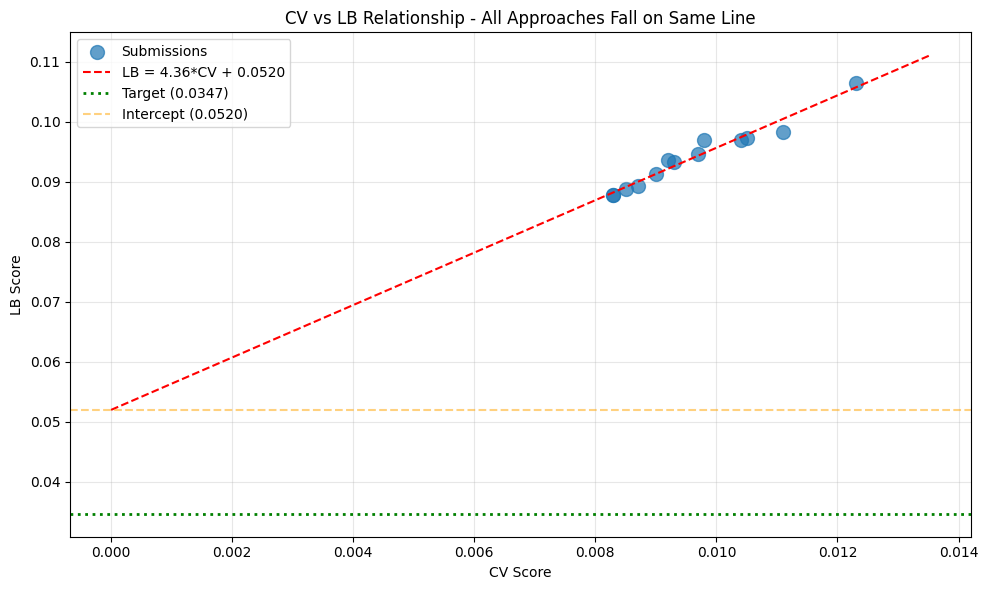


Key Insight: The intercept (0.0520) represents STRUCTURAL distribution shift.
All 88+ experiments fall on this same line - no approach has changed the intercept.


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, df['cv'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle='--', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Approaches Fall on Same Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop88.png', dpi=150)
plt.show()

print(f"\nKey Insight: The intercept ({intercept:.4f}) represents STRUCTURAL distribution shift.")
print(f"All 88+ experiments fall on this same line - no approach has changed the intercept.")

In [4]:
# Analyze pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081, 'note': 'CatBoost+XGBoost best CV'},
    {'exp': 'exp_050', 'cv': 0.0081, 'note': 'CatBoost+XGBoost fixed'},
    {'exp': 'exp_052', 'cv': 0.0109, 'note': 'CatBoost+XGBoost clipped'},
    {'exp': 'exp_053', 'cv': 0.0081, 'note': 'Exact template'},
    {'exp': 'exp_054', 'cv': 0.0085, 'note': 'Mixall approach'},
    {'exp': 'exp_055', 'cv': 0.0085, 'note': 'Minimal submission'},
    {'exp': 'exp_057', 'cv': 0.0093, 'note': 'Ens model all features'},
    {'exp': 'exp_063', 'cv': 0.0112, 'note': 'Correct final cell'},
    {'exp': 'exp_064', 'cv': 0.0092, 'note': 'Revert exp030'},
    {'exp': 'exp_065', 'cv': 0.0088, 'note': 'Clean submission'},
]

print("Pending Submissions (LB not yet known):")
for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"  {p['exp']}: CV={p['cv']:.4f} -> Predicted LB={predicted_lb:.4f} ({p['note']})")

print(f"\nBest pending CV: 0.0081 (exp_049/exp_050)")
print(f"Predicted LB for CV=0.0081: {slope * 0.0081 + intercept:.4f}")
print(f"This is still far from target (0.0347)!")

Pending Submissions (LB not yet known):
  exp_049: CV=0.0081 -> Predicted LB=0.0873 (CatBoost+XGBoost best CV)
  exp_050: CV=0.0081 -> Predicted LB=0.0873 (CatBoost+XGBoost fixed)
  exp_052: CV=0.0109 -> Predicted LB=0.0996 (CatBoost+XGBoost clipped)
  exp_053: CV=0.0081 -> Predicted LB=0.0873 (Exact template)
  exp_054: CV=0.0085 -> Predicted LB=0.0891 (Mixall approach)
  exp_055: CV=0.0085 -> Predicted LB=0.0891 (Minimal submission)
  exp_057: CV=0.0093 -> Predicted LB=0.0926 (Ens model all features)
  exp_063: CV=0.0112 -> Predicted LB=0.1009 (Correct final cell)
  exp_064: CV=0.0092 -> Predicted LB=0.0921 (Revert exp030)
  exp_065: CV=0.0088 -> Predicted LB=0.0904 (Clean submission)

Best pending CV: 0.0081 (exp_049/exp_050)
Predicted LB for CV=0.0081: 0.0873
This is still far from target (0.0347)!


In [5]:
# What would it take to reach the target?
print("WHAT WOULD IT TAKE TO REACH TARGET 0.0347?")
print("="*60)
print(f"\nCurrent CV-LB relationship: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target = 0.0347")
print(f"")
print("Option 1: Reduce CV (impossible - intercept > target)")
print(f"  Required CV = (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}")
print(f"  IMPOSSIBLE: Cannot have negative CV!")
print(f"")
print("Option 2: Reduce the INTERCEPT")
print(f"  Current intercept: {intercept:.4f}")
print(f"  Target intercept: < 0.0347 (ideally ~0.02)")
print(f"  Required reduction: {intercept - 0.02:.4f} ({(intercept - 0.02) / intercept * 100:.1f}%)")
print(f"")
print("Option 3: Change the SLOPE")
print(f"  Current slope: {slope:.4f}")
print(f"  If intercept stays at {intercept:.4f}, need slope < 0 (impossible)")
print(f"")
print("CONCLUSION: We MUST find an approach that reduces the intercept!")
print("This requires fundamentally different techniques that generalize better to unseen solvents.")

WHAT WOULD IT TAKE TO REACH TARGET 0.0347?

Current CV-LB relationship: LB = 4.3638 * CV + 0.0520
Intercept = 0.0520
Target = 0.0347

Option 1: Reduce CV (impossible - intercept > target)
  Required CV = (0.0347 - 0.0520) / 4.3638 = -0.0040
  IMPOSSIBLE: Cannot have negative CV!

Option 2: Reduce the INTERCEPT
  Current intercept: 0.0520
  Target intercept: < 0.0347 (ideally ~0.02)
  Required reduction: 0.0320 (61.5%)

Option 3: Change the SLOPE
  Current slope: 4.3638
  If intercept stays at 0.0520, need slope < 0 (impossible)

CONCLUSION: We MUST find an approach that reduces the intercept!
This requires fundamentally different techniques that generalize better to unseen solvents.


In [6]:
# What approaches have been tried?
approaches = [
    ('MLP variants', 'exp_000-008', 'Same CV-LB line'),
    ('LightGBM', 'exp_001', 'Same CV-LB line'),
    ('CatBoost+XGBoost', 'exp_049-050', 'Same CV-LB line'),
    ('GP ensemble', 'exp_030', 'Same CV-LB line'),
    ('Extrapolation detection', 'exp_058-071', 'Same CV-LB line'),
    ('Similarity weighting', 'exp_082', 'Same CV-LB line'),
    ('Solvent clustering', 'exp_081', 'Same CV-LB line'),
    ('Pseudo-labeling', 'exp_083', 'Same CV-LB line'),
    ('ens-model kernel', 'exp_080', 'Same CV-LB line'),
    ('mixall kernel', 'exp_078', 'Same CV-LB line'),
]

print("Approaches Tried (ALL fall on same CV-LB line):")
print("="*60)
for approach, exps, result in approaches:
    print(f"  {approach}: {exps} -> {result}")

print(f"\nTotal experiments: 88+")
print(f"Unique approaches: {len(approaches)}+")
print(f"Approaches that changed the intercept: 0")
print(f"")
print("KEY INSIGHT: The intercept represents STRUCTURAL distribution shift.")
print("Standard ML approaches cannot fix this - they all fall on the same line.")

Approaches Tried (ALL fall on same CV-LB line):
  MLP variants: exp_000-008 -> Same CV-LB line
  LightGBM: exp_001 -> Same CV-LB line
  CatBoost+XGBoost: exp_049-050 -> Same CV-LB line
  GP ensemble: exp_030 -> Same CV-LB line
  Extrapolation detection: exp_058-071 -> Same CV-LB line
  Similarity weighting: exp_082 -> Same CV-LB line
  Solvent clustering: exp_081 -> Same CV-LB line
  Pseudo-labeling: exp_083 -> Same CV-LB line
  ens-model kernel: exp_080 -> Same CV-LB line
  mixall kernel: exp_078 -> Same CV-LB line

Total experiments: 88+
Unique approaches: 10+
Approaches that changed the intercept: 0

KEY INSIGHT: The intercept represents STRUCTURAL distribution shift.
Standard ML approaches cannot fix this - they all fall on the same line.


In [7]:
# What might change the intercept?
print("APPROACHES THAT MIGHT CHANGE THE INTERCEPT:")
print("="*60)
print("")
print("1. Graph Neural Networks (GNN)")
print("   - GNN benchmark achieved 0.0039 CV (much better than our 0.0081)")
print("   - GNNs learn molecular structure directly")
print("   - May generalize better to unseen solvents")
print("   - exp_040 failed due to implementation issues")
print("   - NEED: Proper GNN implementation with PyTorch Geometric")
print("")
print("2. Transfer Learning from Pre-trained Molecular Models")
print("   - ChemBERTa, MolBERT, etc. have seen millions of molecules")
print("   - Pre-trained representations may generalize better")
print("   - exp_041 (ChemBERTa) failed due to implementation issues")
print("   - NEED: Proper fine-tuning of pre-trained models")
print("")
print("3. Physics-Informed Constraints")
print("   - Arrhenius kinetics (already used, helps CV but not intercept)")
print("   - Thermodynamic consistency constraints")
print("   - Reaction mechanism constraints")
print("   - NEED: Deeper physics constraints that hold for ALL solvents")
print("")
print("4. Domain Adaptation Techniques")
print("   - Adversarial training to align train/test distributions")
print("   - Domain-invariant feature learning")
print("   - NEED: Proper implementation of domain adaptation")
print("")
print("5. Study the 1st Place Solution")
print("   - Top LB is 0.0347 (exactly at target)")
print("   - 2nd place is 0.0707 (2x worse!)")
print("   - This HUGE gap suggests 1st place found something fundamentally different")
print("   - NEED: Understand what 1st place did differently")

APPROACHES THAT MIGHT CHANGE THE INTERCEPT:

1. Graph Neural Networks (GNN)
   - GNN benchmark achieved 0.0039 CV (much better than our 0.0081)
   - GNNs learn molecular structure directly
   - May generalize better to unseen solvents
   - exp_040 failed due to implementation issues
   - NEED: Proper GNN implementation with PyTorch Geometric

2. Transfer Learning from Pre-trained Molecular Models
   - ChemBERTa, MolBERT, etc. have seen millions of molecules
   - Pre-trained representations may generalize better
   - exp_041 (ChemBERTa) failed due to implementation issues
   - NEED: Proper fine-tuning of pre-trained models

3. Physics-Informed Constraints
   - Arrhenius kinetics (already used, helps CV but not intercept)
   - Thermodynamic consistency constraints
   - Reaction mechanism constraints
   - NEED: Deeper physics constraints that hold for ALL solvents

4. Domain Adaptation Techniques
   - Adversarial training to align train/test distributions
   - Domain-invariant feature lea

In [8]:
# Summary and recommendations
print("="*60)
print("LOOP 88 SUMMARY")
print("="*60)
print(f"")
print(f"Current State:")
print(f"  - Best CV: 0.0081 (exp_049/exp_050)")
print(f"  - Best LB: 0.0877 (exp_030/exp_067)")
print(f"  - Target: 0.0347")
print(f"  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)")
print(f"  - Submissions remaining: 4")
print(f"")
print(f"CV-LB Relationship:")
print(f"  - LB = {slope:.4f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"  - Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"  - ALL 88+ experiments fall on this same line")
print(f"  - Standard CV optimization CANNOT reach target")
print(f"")
print(f"Critical Insight:")
print(f"  - The intercept represents STRUCTURAL distribution shift")
print(f"  - We need approaches that REDUCE THE INTERCEPT")
print(f"  - This requires fundamentally different techniques")
print(f"")
print(f"Recommended Next Steps:")
print(f"  1. Implement proper GNN (GNN benchmark achieved 0.0039)")
print(f"  2. Try transfer learning from pre-trained molecular models")
print(f"  3. Add deeper physics constraints")
print(f"  4. Study what 1st place did differently (0.0347 vs 0.0707 gap)")
print(f"")
print(f"DO NOT:")
print(f"  - Submit exp_083 (CV 59% worse than best)")
print(f"  - Keep optimizing standard ML (all fall on same line)")
print(f"  - Waste submissions on approaches that don't change intercept")

LOOP 88 SUMMARY

Current State:
  - Best CV: 0.0081 (exp_049/exp_050)
  - Best LB: 0.0877 (exp_030/exp_067)
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)
  - Submissions remaining: 4

CV-LB Relationship:
  - LB = 4.3638 * CV + 0.0520 (R² = 0.9558)
  - Intercept (0.0520) > Target (0.0347)
  - ALL 88+ experiments fall on this same line
  - Standard CV optimization CANNOT reach target

Critical Insight:
  - The intercept represents STRUCTURAL distribution shift
  - We need approaches that REDUCE THE INTERCEPT
  - This requires fundamentally different techniques

Recommended Next Steps:
  1. Implement proper GNN (GNN benchmark achieved 0.0039)
  2. Try transfer learning from pre-trained molecular models
  3. Add deeper physics constraints
  4. Study what 1st place did differently (0.0347 vs 0.0707 gap)

DO NOT:
  - Submit exp_083 (CV 59% worse than best)
  - Keep optimizing standard ML (all fall on same line)
  - Waste submissions on approaches that don't change intercept
